In [ ]:
import pandas as pd
bitcoin = pd.read_csv("/content/Bitfinex_BTCUSD_d.csv", skiprows=1)[1:-750]
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin = bitcoin[::-1]
bitcoin = bitcoin.reset_index(drop=True)
bitcoin.head(2)

,unix,date,symbol,open,high,low,close,Volume USD,Volume BTC
0,1488240000,2017-02-28,BTC/USD,1195.5,1216.0,1176.6,1189.1,16251499.88,13608.74
1,1488326400,2017-03-01,BTC/USD,1189.1,1236.4,1186.0,1233.2,20165589.45,16589.62


In [ ]:
bitcoin["weekday"] = bitcoin["date"].dt.weekday
bitcoin["year"] = bitcoin["date"].dt.year
bitcoin["month"] = bitcoin["date"].dt.month

In [ ]:
bitcoin["open2high"] = ((bitcoin["open"] - bitcoin["close"]) / (bitcoin["high"] - bitcoin["low"])).abs()

In [ ]:
for day in range(1,15):
  bitcoin[f"close_d{day}"] = bitcoin["close"].shift(day)


bitcoin["close_avg_2m"] = bitcoin["close"].shift(1).rolling(window=60).mean()
bitcoin.fillna(method="bfill", inplace=True)
bitcoin.drop(columns=["unix", "date", "symbol"], axis=1, inplace=True)

In [ ]:
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])

In [ ]:
bitcoin["target"] = bitcoin["close"].shift(-1)
bitcoin.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = bitcoin.drop("target", axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = bitcoin["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
# cols = bitcoin.drop("target", axis=1).columns
# pd.DataFrame(data=[model.coef_], columns=cols).T

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Результаты эфира:

In [ ]:
mae_live = 343.5625102486633
max_live = 6254.50211994203
r2_live = 0.9966815352808057

Задание 1:

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
model_MLPR = MLPRegressor(solver='lbfgs', max_iter=10**3, learning_rate = 'adaptive', 
                          max_fun = 30000)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
model_MLPR.fit(X_scaled, y_train)

y_full_prediction = model_MLPR.predict(X)
mae_mlp = mean_absolute_error(y_full_prediction, y)
max_mlp =  max_error(y_full_prediction, y)
r2_mlp =  r2_score(y_full_prediction, y)

# иногда результаты лучше эфирных, иногда хуже, это ж нейросеть
print(f"LinearRegression_live: MAE = {mae_live}, MAX = {max_live},  r2 = {r2_live}")
print(f"MLPRegressor:          MAE = {mae_mlp}, MAX = {max_mlp}, r2 = {r2_mlp}")
print()

LinearRegression_live: MAE = 343.5625102486633, MAX = 6254.50211994203,  r2 = 0.9966815352808057
MLPRegressor:          MAE = 320.5146112085296, MAX = 6558.41244102941, r2 = 0.9973087728391522



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Задание 2:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(criterion = 'friedman_mse', min_samples_split = 10,
                                  min_samples_leaf = 5)
model_DTR.fit(X_train, y_train)

y_full_prediction = model_DTR.predict(X)
mae_dtr = mean_absolute_error(y_full_prediction, y)
max_dtr =  max_error(y_full_prediction, y)
r2_dtr =  r2_score(y_full_prediction, y)

In [ ]:
from sklearn.linear_model import Ridge
model_R = Ridge(solver = 'auto', max_iter = 10**6)
model_R.fit(X_train, y_train)

y_full_prediction = model_R.predict(X)
mae_r = mean_absolute_error(y_full_prediction, y)
max_r =  max_error(y_full_prediction, y)
r2_r =  r2_score(y_full_prediction, y)

In [ ]:
from sklearn.linear_model import Lasso
model_L = Lasso(max_iter = 10**4)
model_L.fit(X_train, y_train)

y_full_prediction = model_L.predict(X)
mae_l = mean_absolute_error(y_full_prediction, y)
max_l =  max_error(y_full_prediction, y)
r2_l =  r2_score(y_full_prediction, y)

In [ ]:
d = {'Model': ['LinearRegression_live', 'MLPRegressor','DecisionTreeRegressor', 'Ridge', 'Lasso'],
     'MAE': [mae_live, mae_mlp, mae_dtr, mae_r, mae_l], 'MAX': [max_live, max_mlp, max_dtr, max_r, max_l], 
     'R2': [r2_live, r2_mlp, r2_dtr, r2_r, r2_l]}
res_df = pd.DataFrame(data=d)
res_df

,Model,MAE,MAX,R2
0,LinearRegression_live,343.562510,6254.502120,0.996682
1,MLPRegressor,320.514611,6558.412441,0.997309
2,DecisionTreeRegressor,275.001497,8746.400000,0.997182
3,Ridge,338.752389,6505.804790,0.996637
4,Lasso,332.390057,6544.737061,0.996768


Задание 3:

In [ ]:
bitcoin = pd.read_csv("/content/Bitfinex_BTCUSD_d.csv", skiprows=1)[1:-750]
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin = bitcoin[::-1]
bitcoin = bitcoin.reset_index(drop=True)
bitcoin["weekday"] = bitcoin["date"].dt.weekday
bitcoin["year"] = bitcoin["date"].dt.year
bitcoin["month"] = bitcoin["date"].dt.month
bitcoin["open2high"] = ((bitcoin["open"] - bitcoin["close"]) / (bitcoin["high"] - bitcoin["low"])).abs()

for day in range(1,15):
  bitcoin[f"close_d{day}"] = bitcoin["close"].shift(day)

bitcoin["close_avg_2m"] = bitcoin["close"].shift(1).rolling(window=60).mean()
bitcoin.fillna(method="bfill", inplace=True)
bitcoin.drop(columns=["unix", "date", "symbol"], axis=1, inplace=True)
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])

bitcoin["target"] = bitcoin["close"].shift(-5)

bitcoin.dropna(inplace=True)
X = bitcoin.drop("target", axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = bitcoin["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
from sklearn.linear_model import LinearRegression

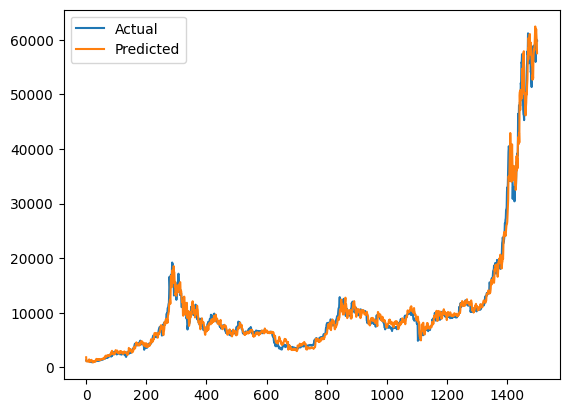

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

plt.plot(y, label="Actual")
plt.plot(model.predict(X), label="Predicted")
plt.legend()

y_full_prediction = model.predict(X)
mae_5d =  mean_absolute_error(y_full_prediction, y)
max_5d = max_error(y_full_prediction, y)
r2_5d = r2_score(y_full_prediction, y)

In [ ]:
d2 = {'Model': ['LinearRegression_live', 'LinearRegression_5days_predict'],
     'MAE': [mae_live, mae_5d], 'MAX': [max_live, max_5d], 
     'R2': [r2_live, r2_5d]}
pd.DataFrame(data=d2)

,Model,MAE,MAX,R2
0,LinearRegression_live,343.562510,6254.502120,0.996682
1,LinearRegression_5days_predict,805.622045,11681.946353,0.984877


Задание 4:

In [ ]:
bitcoin = pd.read_csv("/content/Bitfinex_BTCUSD_d.csv", skiprows=1)[1:-750]
bitcoin["date"] = pd.to_datetime(bitcoin["date"])
bitcoin = bitcoin[::-1]
bitcoin = bitcoin.reset_index(drop=True)
bitcoin["weekday"] = bitcoin["date"].dt.weekday
bitcoin["year"] = bitcoin["date"].dt.year
bitcoin["month"] = bitcoin["date"].dt.month
bitcoin["open2high"] = ((bitcoin["open"] - bitcoin["close"]) / (bitcoin["high"] - bitcoin["low"])).abs()

for day in range(1,31):
  bitcoin[f"close_d{day}"] = bitcoin["close"].shift(day)


bitcoin["close_avg_2m"] = bitcoin["close"].shift(1).rolling(window=60).mean()
bitcoin.fillna(method="bfill", inplace=True)
bitcoin.drop(columns=["unix", "date", "symbol"], axis=1, inplace=True)
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])

bitcoin["target"] = bitcoin["close"].shift(-1)

bitcoin.dropna(inplace=True)
X = bitcoin.drop("target", axis=1)

In [ ]:
X

,open,high,low,close,Volume USD,Volume BTC,open2high,close_d1,close_d2,close_d3,close_d4,close_d5,close_d6,close_d7,close_d8,close_d9,close_d10,close_d11,close_d12,close_d13,close_d14,close_d15,close_d16,close_d17,close_d18,close_d19,close_d20,close_d21,close_d22,close_d23,close_d24,close_d25,close_d26,close_d27,close_d28,close_d29,close_d30,close_avg_2m,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2017,year_2018,year_2019,year_2020,year_2021
0,1195.500000,1216.0,1176.6,1189.1,1.625150e+07,13608.740000,0.162437,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1186.611667,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1189.100000,1236.4,1186.0,1233.2,2.016559e+07,16589.620000,0.875000,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1186.611667,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1233.200000,1285.9,1212.0,1258.0,2.653649e+07,21274.820000,0.335589,1233.2,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1186.611667,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1258.000000,1294.9,1256.2,1289.2,2.074881e+07,16223.730000,0.806202,1258.0,1233.2,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1186.611667,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1289.200000,1291.9,1240.0,1267.8,1.413155e+07,11156.610000,0.412331,1289.2,1258.0,1233.200000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.1,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1189.100000,1186.611667,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,57994.000000,58639.0,55555.0,55962.0,4.951918e+08,8848.715118,0.658885,57991.0,59145.0,58240.239187,57020.000000,58959.000000,58724.000000,58796.000000,58840.0,57675.0,55780.0,55886.0,54993.0,51358.0,52328.0,54336.799828,54070.000000,57366.000000,58079.000000,58049.627979,57640.000000,58849.000000,56924.000000,55688.000000,59000.0,61202.887014,57297.000000,57877.000000,55985.000000,54955.307867,52399.000000,52759.314365,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1500,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596,0.879967,55962.0,57991.0,59145.000000,58240.239187,57020.000000,58959.000000,58724.000000,58796.0,58840.0,57675.0,55780.0,55886.0,54993.0,51358.0,52328.000000,54336.799828,54070.000000,57366.000000,58079.000000,58049.627979,57640.000000,58849.000000,56924.000000,55688.0,59000.000000,61202.887014,57297.000000,57877.000000,55985.000000,54955.307867,53038.114365,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1501,58110.000000,

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = bitcoin["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

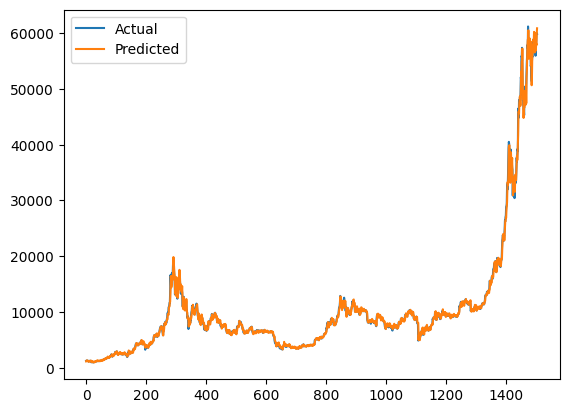

In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

plt.plot(y, label="Actual")
plt.plot(model.predict(X), label="Predicted")
plt.legend()

y_full_prediction = model.predict(X)
mae_30d =  mean_absolute_error(y_full_prediction, y)
max_30d = max_error(y_full_prediction, y)
r2_30d = r2_score(y_full_prediction, y)

In [ ]:
d2 = {'Model': ['LinearRegression_live', 'LinearRegression_5days_predict', 'LinearRegression_30days_history'],
     'MAE': [mae_live, mae_5d, mae_30d], 'MAX': [max_live, max_5d, max_30d], 
     'R2': [r2_live, r2_5d, r2_30d]}
pd.DataFrame(data=d2)

,Model,MAE,MAX,R2
0,LinearRegression_live,343.562510,6254.502120,0.996682
1,LinearRegression_5days_predict,805.622045,11681.946353,0.984877
2,LinearRegression_30days_history,343.284394,4726.517740,0.996807


Задание 5:

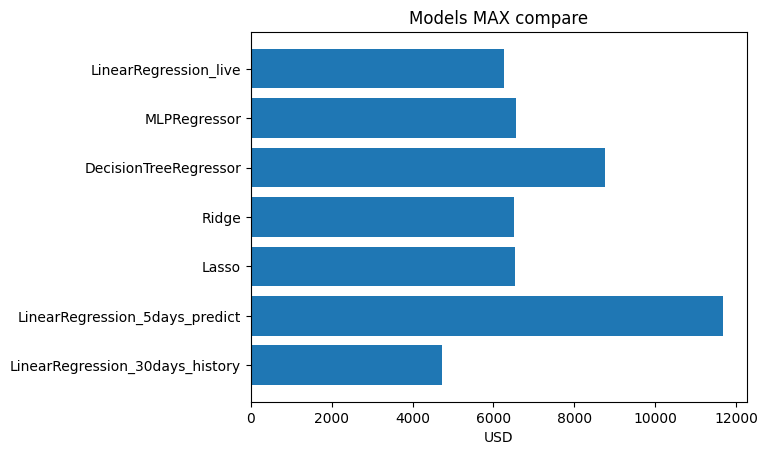

In [ ]:
import numpy as np

labels = ['LinearRegression_live', 'MLPRegressor', 'DecisionTreeRegressor', 'Ridge', 'Lasso', 'LinearRegression_5days_predict', 'LinearRegression_30days_history']
maximum = [max_live, max_mlp, max_dtr, max_r, max_l, max_5d, max_30d]
mae =     [mae_live, mae_mlp, mae_dtr, mae_r, mae_l, mae_5d, mae_30d]

fig, ax = plt.subplots()

y_pos = np.arange(len(labels))

ax.barh(y_pos, maximum)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  
ax.set_xlabel('USD')
ax.set_title('Models MAX compare')

plt.show()

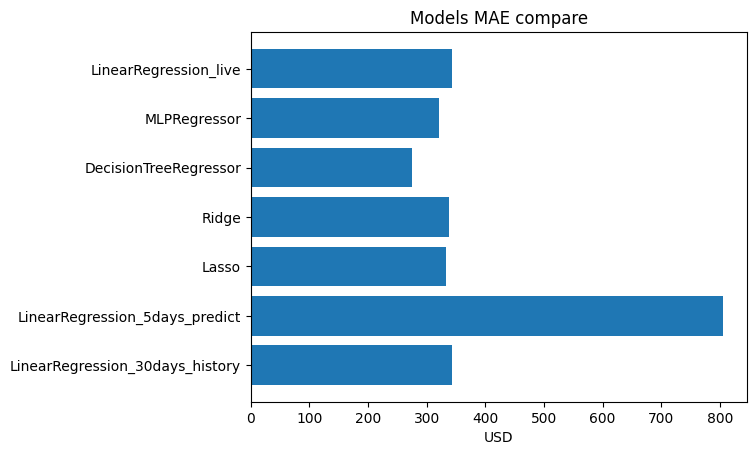

In [ ]:
fig, ax = plt.subplots()

ax.barh(y_pos, mae)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  
ax.set_xlabel('USD')
ax.set_title('Models MAE compare')

plt.show()

Задание 6:

Проделанную работу считаю одновременно интересной и полезной. 

При увеличении дальности прогноза точность сильно снижается.
Увеличение количества известных значений за предыдущие дни повышает точность прогноза. 

Регрессионные модели предположительно показывют большую стабильность результатов, нежели нейросеть.

Для получения качественного прогноза очень важно правильно интерпретировать данные и грамотно их подготовить. А также выбрать наиболее подходящий тип модели, саму модель и её параметры.